# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|paamiut
Processing record 2|yulara
Processing record 3|nanortalik
Processing record 4|yellowknife
City not found. skipping.
Processing record 5|georgetown
Processing record 6|punta arenas
Processing record 7|albany
Processing record 8|grindavik
Processing record 9|natchitoches
Processing record 10|redlands
Processing record 11|victoria point
Processing record 12|busselton
Processing record 13|port alfred
Processing record 14|mataura
Processing record 15|nikolskoye
Processing record 16|rikitea
Processing record 17|new norfolk
Processing record 18|jamestown
Processing record 19|morvi
City not found. skipping.
Processing record 20|te anau
City not found. skipping.
Processing record 21|srednekolymsk
Processing record 22|porto novo
Processing record 23|chokurdakh
Processing record 24|kruisfontein
Processing record 25|tuktoyaktuk
Processing record 26|shingu
Processing record 27|richards bay
Processing record 28|vila franca do campo
Processing record 29|batagay
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
#Creating city dataframe
city_df = pd.DataFrame({"City":city_name,
                       "Cloudiness":cloudiness,
                       "Country":country,
                       "Date":date,
                       "Humidity":humidity,
                       "Lat":lat,
                       "Lng":lng,
                       "Max Temp":max_temp,
                       "Wind Speed":wind_speed})

city_df = city_df.rename_axis('City ID')

#Exporting data to Csv
city_df.to_csv("../output_data/cities.csv")

#Display dataframe
city_df.head()

               

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Paamiut,22,GL,1615586778,73,61.9940,-49.6678,13.08,6.85
1,Yulara,90,AU,1615586779,78,-25.2406,130.9889,73.40,5.75
2,Nanortalik,1,GL,1615586779,70,60.1432,-45.2371,15.44,9.19
3,Yellowknife,75,CA,1615586708,56,62.4560,-114.3525,8.60,17.27
4,George Town,20,MY,1615586488,94,5.4112,100.3354,77.00,2.30


In [37]:
city_df.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

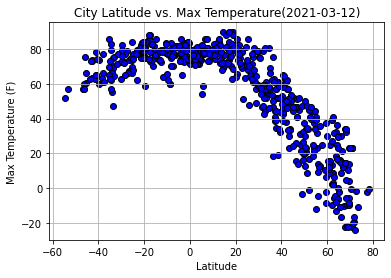

In [40]:
timestamp = city_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

#Creating plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({shortened_timestamp})")
plt.savefig("../output_data/Lat_vs_temp_plot")
plt.show()

## Latitude vs. Humidity Plot

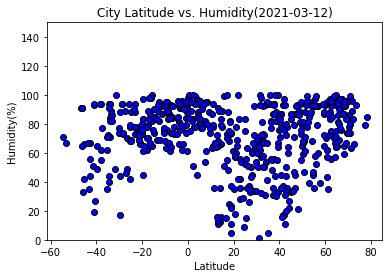

In [42]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity({shortened_timestamp})")
plt.savefig("../output_data/Lat_vs_humidity_plot")
plt.show()

## Latitude vs. Cloudiness Plot

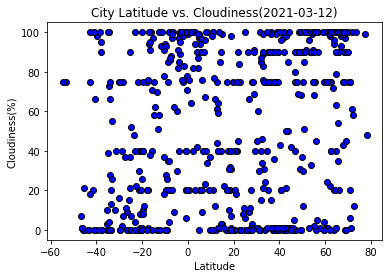

In [45]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness({shortened_timestamp})")
plt.savefig("../output_data/Lat_vs_cloudiness_plot")
plt.show()

## Latitude vs. Wind Speed Plot

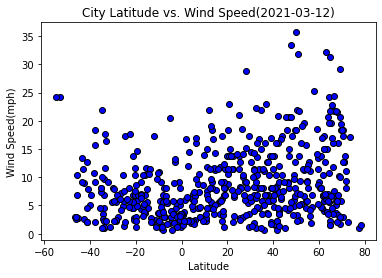

In [44]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed({shortened_timestamp})")
plt.savefig("../output_data/Lat_vs_Wind Speed_plot")
plt.show()

## Linear Regression

In [53]:
#Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [54]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8921275579912847


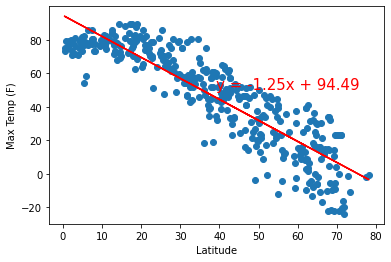

None


In [55]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5212193724057429


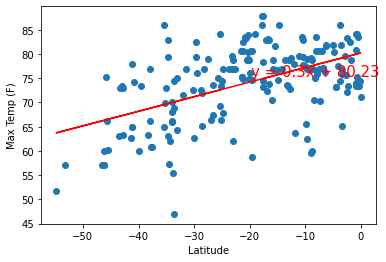

None


In [56]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19534530863130004


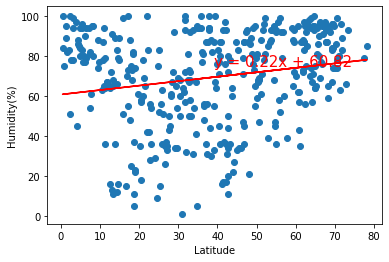

None


In [58]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity(%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3781482752446223


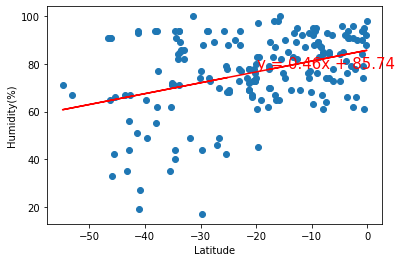

None


In [59]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylabel("Humidity(%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19733142073643212


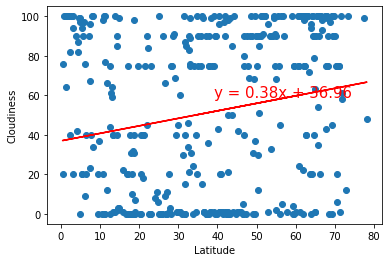

None


In [60]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3060490307473557


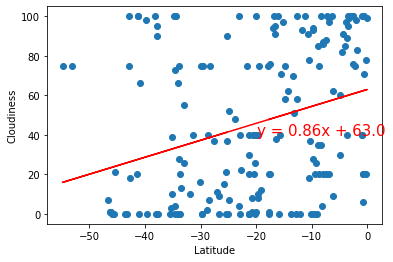

None


In [61]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20782856946758563


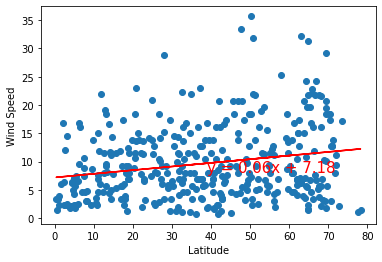

None


In [62]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.26979062131574216


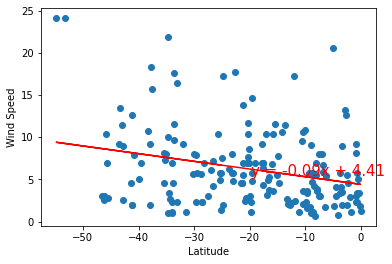

None


In [64]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))